In [180]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://mma.prnewswire.com/media/902446/Loyalist_College_Loyalist_College_to_launch_Canada_s_first_Techn.jpg?p=facebook")

# <p style='text-align: center;'>AISC2000 - Machine Learning 2 - Application Exercise 2 </p>
### <p style='text-align: center;'>By Group A </p>

### <p style='text-align: center;'>Classification models and its performance: </p>
#### <p style='text-align: center;'>Logistic Regression vs Decision Tree vs Random Forest </p>

<p style='text-align: center;'>===================================================================================================== </p>

## <p style='text-align: center;'>Group members and their contribution details </p>

In [181]:
import pandas as pd
# assign data of lists.
data = {'Name': ['Prachi', 'Vishal', 'Jinal Shashikantbhai Barot', 'Tajdar Unnisa Begum', 'Harshil Patel', 'Prateek Kumar Soni'],
        'Student_ID': [500204185, 500203819 , 500198288 , 500201392 , 500202876 , 500203815],
        'Contribution (in %)':['16.66', '16.66', '16.66', '16.66','16.66', '16.66' ]}
# Create DataFrame.
df = pd.DataFrame(data)
# Set the title and Print the dataframe.
df = df.style.set_caption("Group-A Members' Contribution:")
df

,Name,Student_ID,Contribution (in %)
0,Prachi,500204185,16.66
1,Vishal,500203819,16.66
2,Jinal Shashikantbhai Barot,500198288,16.66
3,Tajdar Unnisa Begum,500201392,16.66
4,Harshil Patel,500202876,16.66
5,Prateek Kumar Soni,500203815,16.66


<p style='text-align: center;'>===================================================================================================== </p>

### <p style= 'text-align: center;'> Question 1 - Import libraries, modules and methods </p>

In [182]:
#import pandas as pd  # ALready imported to display group members names and ID
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

<p style='text-align: center;'>===================================================================================================== </p>

### <p style= 'text-align: center;'> Question 2 - Read data and understand data </p>

**Read csv file and Explore the dataset**

In [183]:
df = pd.read_csv('LoanTrain.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here we are reading the dataset as a dataframe using **read_csv** function from pandas.

**head()** function of dataframe provides first five records from the dataframe along with the headers/attribute names that gives idea about following:

**What type of data the dataset contains? What it is all about?**
In this case, it clearly depicts that we are given loan dataset and each record represents a unique loan application.

**What different features this dataset has?**
It provides all the columns of the dataset that shows what kind of features each record has and help us in understanding about it. Here, each feature is the information for a particular loan application identified by the Loan_ID. 
Also, we can see what type of values different columns is having in this loan dataset. Like numerical columns - ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, loan amount & term, while there are other categorical attributes such as Gender, Married, Dependents, Self_Employed, Education, Property_Area & Loan_Status.

**Check the columns**

In [184]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

This Loan dataset has **13 different attributes** containing following information about the loan application and the applicant.

* Personal information of applicant like Gender, Marital status, No of  Dependents, Education level(Graduate or not), Property Area whether its located in Urban or Rural area as it is one of the main thing to be considered for predicting property's resell value in case required

* Employment details of applicant like Self Employed or not, ApplicantIncome to consider requested Loan Amount

* Other details of applicant like Credit History for identifying background history of applicant's financial debts, Coapplicant Income for security and reference purpose

* Loan details like Requested Loan_ID that uniquely identify one loan application from the system, Requested Loan Amount, Loan Amount Term, LoanStatus whether the loan application is approved or not

**Datatype of the columns**

In [185]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In this given dataset, we have 5 numeric columns (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History) and rest all other are objects, which could be categorical in nature.

**NOTE** :
Below is another way of checking the data type of each columns using **info()** function which gives additional details like counts of non-null records in each column.

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**info()** function gives us a summary of the dataset that contains column names, count of non-null values for each column and the datatype of each column. It provides total number of records and columns of the dataset.

Also, it gives total number of columns of each type.
For the given dataset, we have 4 columns with float64, 1 column with int64, and 8 columns with object datatype.

In [187]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**describe()** function gives the statistical properties of numerical columns from the dataset such as count of non-null values, mean ,standard deviation, minimum and maximum values and 25%, 50% and 70% percentile.

**Shape/Dimension of the dataset**

In [188]:
df.shape

(614, 13)

Above output explains that the loan dataset have ***13 columns and 614 records***

**The value counts of “Loan_Status"**

In [189]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

***value_counts()*** function provides the count of different values from the given column. Loan_Status have two values in the dataset Y and N. So this function has given the counts of records where Loan_Status is Y and N, respectively 422 and 192. 

<AxesSubplot:>

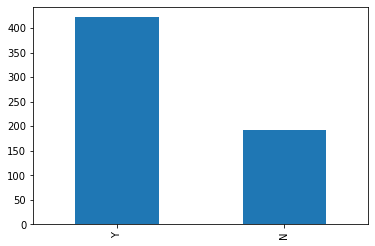

In [190]:
df['Loan_Status'].value_counts().plot.bar()

Above is the histogram for Loan_Status that depicts the number of records having Loan status as Y and N.

<p style='text-align: center;'>===================================================================================================== </p>

### <p style='text-align: center;'>Question 3 - Perform missing value imputation </p>

#### Que 3.A List out feature-wise count of missing values

In [191]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Above output shows number of null values in each column. There are no null values in Loan_ID, Education, ApplicantIncome, CoapplicantIncome, Property_Area and Loan_Status. Other columns have few null values as displayed.

#### Que 3.B Fill missing values in Gender, Married, Dependents, Credit_History, Self_Employed and and Loan_Amount_Term features using the mode of the features.

In the columns with the categorical datatype, missing values will be filled with mode, while the numerical columns will be filled with the median

- Replacing the missing values in the **Gender** column with the mode value

In [192]:
# finding Mode of the Gender first
df['Gender'].mode()

0    Male
dtype: object

This output shows that there are more male applicant than female applicants. Hence, the missing values in this column is more likely to have "Male" value.

In [193]:
# Replacing the missing values with Mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here, we have filled the missing values in Gender column with the mode of the column which is Male.

In [194]:
df["Gender"].isna().sum()

0

Verifying if missing values in **Gender** column is filled up properly or not. 0 Result shows there are no more null exist in this column.

- Replacing the missing values in the **Married** column with the mode value**

In [195]:
# Mode of the Married
print(df['Married'].mode())

0    Yes
dtype: object


This output shows that there are more married applicant than the unmarried ones. Hence, the missing values in this column is more likely to have "Married" value.

In [196]:
# Replacing the missing values with Mode
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here, we have filled the missing values in Married column with the mode of the column which is Yes.

In [197]:
df['Married'].isna().sum()

0

Verifying if missing values in **Married** column is filled up properly or not. 0 Result shows there are no more null exist in this column.

- Replacing the missing values in the **Dependents** column with the mode value

In [198]:
# Mode of the Dependents
print(df['Dependents'].mode())

0    0
dtype: object


This output shows that there are more applicant having no dependents than the applicants having 1 or more dependents. Hence, the missing values in this column is more likely to have "0" value.

In [199]:
# Replacing the missing values with Mode
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here, we have filled the missing values in Dependents column with the mode of the column which is 0.

In [200]:
df['Dependents'].isna().sum()

0

Verifying if missing values in **Dependents** column is filled up properly or not. 0 Result shows there are no more null exist in this column.

- Replacing the missing values in the **Credit_History** column with the mode value

In [201]:
# Mode of the Credit_History
print(df['Credit_History'].mode())

0    1.0
dtype: float64


This output shows that there are more applicant having 1.0 credit history. Hence, the missing values in this column is more likely to have "1.0" value.

In [202]:
# Replacing the missing values with Mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here, we have filled the missing values in **Credit_History** column with the mode of the column which is 1.0

In [203]:
df['Credit_History'].isna().sum()

0

Verifying if missing values in **Credit_History** column is filled up properly or not. 0 Result shows there are no more null exist in this column.

- Replacing the missing values in the **Self_Employed** column with the mode value

In [204]:
# Mode of the Self_Employed
print(df['Self_Employed'].mode())

0    No
dtype: object


This output shows that there are more applicant who are not self employed. Hence, the missing values in this column is more likely to have "No" value.

In [205]:
# Replacing the missing values with Mode
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here, we have filled the missing values in **Self_Employed** column with the mode of the column which is No.

In [206]:
df['Self_Employed'].isna().sum()

0

Verifying if missing values in **Self_Employed** column is filled up properly or not. 0 Result shows there are no more null exist in this column.

- Replacing the missing values in the **Loan_Amount_Term** column with the mode value

In [207]:
# Mode of the Loan_Amount_Term
print(df['Loan_Amount_Term'].mode())

0    360.0
dtype: float64


This output shows that there are more applicant whose Loan Term is 360. Hence, the missing values in this column is more likely to have "360" value.

In [208]:
# Replacing the missing values with Mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here, we have filled the missing values in Loan_Amount_Term column with the mode of the column which is 360.

In [209]:
df['Loan_Amount_Term'].isna().sum()

0

Verifying if missing values in **Loan_Amount_Term** column is filled up properly or not. 0 Result shows there are no more null exist in this column.

#### Que 3.C Use the median to fill the null values of the LoanAmount variable.

In [210]:
# Median of the LoanAmount
print(df['LoanAmount'].median())

128.0


Median loan amount is 128 in the dataset and can be used for replacing the missing values.

In [211]:
# Replacing the missing values with Median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here, we have filled the missing values in LoanAmount column with the median of the column which is 128.

In [212]:
df['LoanAmount'].isna().sum()

0

Verifying if missing values in **LoanAmount** column is filled up properly or not. 0 Result shows there are no more null exist in this column.

#### Que 3.D  Check whether all the missing values are filled in the dataset

In [213]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

From the above dataset it is visible that all the null values are now filled with mode value of the column for categorical data and with median value of the column for numerical data.Hence, the dataset doesn't have any null values.

<p style='text-align: center;'>===================================================================================================== </p>

### <p style='text-align: center;'> Question 4 - Treat outlier and generate dummy variables

#### Que 4.A  Do the log transformation to 'LoanAmount' to treat outlier and show the histogram

array([[<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'LoanAmount_log'}>]], dtype=object)

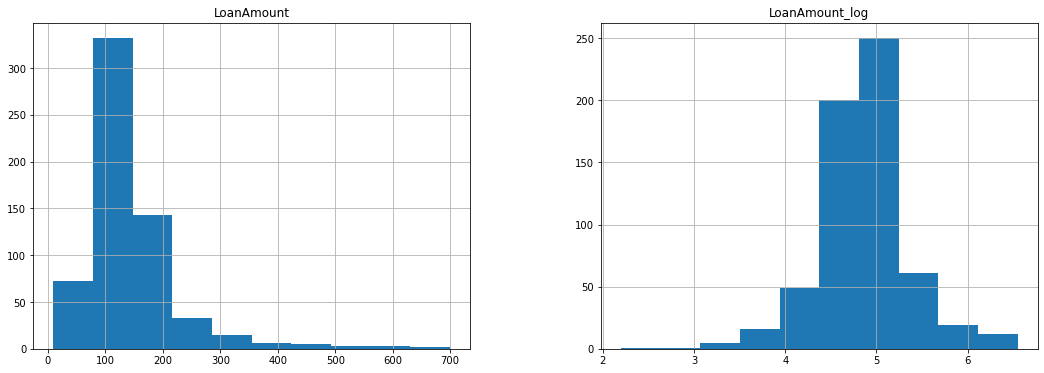

In [214]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df.iloc[:,[8,13]].hist(figsize=(18,6))

After comparing the above 2 histograms, we can clearly see that the outliers of the original Loan Amount feature are being treated after log transformation. The frequency of the transformed loan amount is mainly higher within the range from 4.5 to 5 value.

#### Que 4.B Drop the Loan_ID variable as it does not have any effect on the loan status.

In [215]:
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760


Above output shows the dataframe where Loan_ID column is dropped.

#### Que 4.C Make dummy variables for the categorical variables. The dummy variable turns categorical variables into a series of 0 and 1. 

In [216]:
df = pd.get_dummies(data=df, columns=['Gender', 'Married', 'Dependents','Education','Self_Employed','Property_Area',])
print(df.columns)
df.head()

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,Y,4.852030,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,N,4.852030,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,4.189655,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,4.787492,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,4.948760,0,1,1,...,0,0,0,1,0,1,0,0,0,1


Observing above dataframe, we can clearly see that dummy variables are created for all the categorical features and appended in the same dataframe. We have excluded creating dummies for **"Loan_Status"** column which is our target variable.

The dummy variables are generated as follows:
- Gender is replaced with 2 new features as Gender_Male & Gender_Female.

- Similarly, other columns having categorical values are replaced with number of unique values contained in a particular column.

- Dependents is replaced with the 3 new columns as it has 3 different values in the original data such as 0, 1, and 2.

<p style='text-align: center;'>===================================================================================================== </p>

### <p style='text-align: center;'>Question 5. Discover through feature engineering 

#### Que 5.A Create a new feature “Total Income” which is the combine the Applicant Income and Coapplicant Income. Take the log transformation to make the distribution close to normal.

- creating new feature **Total_income**

In [217]:
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [218]:
df['Total_income'].head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: Total_income, dtype: float64

In [219]:
#log transformation of total_income and plotting the histogram
df['Total_income_log']=np.log(df['Total_income'])
df['Total_income_log'].head()

0    8.674026
1    8.714568
2    8.006368
3    8.505323
4    8.699515
Name: Total_income_log, dtype: float64

Here we can see that TotalIncome is calculated by adding Applicant Income with Coapplicant Income and trasformed to log. After the log transformation, the values are seems normally distributed as compared to the originally calculated TotalIncome.

#### Que 5.b Create a new feature “EMI” which is the monthly amount to be paid by the applicant to repay the loan. 

In [220]:
#creating new feature EMI
df['EMI'] = ((df['LoanAmount']/df['Loan_Amount_Term']))
df['EMI'].head()

0    0.355556
1    0.355556
2    0.183333
3    0.333333
4    0.391667
Name: EMI, dtype: float64

EMI value can be calculated dividing LoanAmount with Loan_Amount_Term 

#### Que 5.c Create a new feature “Balance Income” which is the income left after the EMI has been paid.

In [221]:
df['Balance_Income'] = df['Total_income'] - df['EMI']
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_income,Total_income_log,EMI,Balance_Income
0,5849,0.0,128.0,360.0,1.0,Y,4.852030,0,1,1,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5848.644444
1,4583,1508.0,128.0,360.0,1.0,N,4.852030,0,1,0,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,6090.644444
2,3000,0.0,66.0,360.0,1.0,Y,4.189655,0,1,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2999.816667
3,2583,2358.0,120.0,360.0,1.0,Y,4.787492,0,1,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4940.666667
4,6000,0.0,141.0,360.0,1.0,Y,4.948760,0,1,1,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5999.608333


New feature **Balance_Income** which represents the balance amount after deducting EMI from Total_income

##### Que 5.d Drop the variables which we used to create these new features.

In [222]:
df=df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
df.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_income', 'Total_income_log', 'EMI', 'Balance_Income'],
      dtype='object')

From the above output we can see that below columns are dropped as those are not needed now.
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term

<p style='text-align: center;'>===================================================================================================== </p>

### <p style='text-align: center;'>Question 6. Prepare data before classification

#### Que 6.A  Drop target variable from the training dataset and save it in another dataset.

In [223]:
X = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

Here we are creating training dataset X which doesn't consist target variable Loan_Status. y is initialized with the target variable.

#### Que 6.B Divide train dataset into training and validation part.

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=10)

We are splitting the dataset X into 80:20 ratio, where 20% data is seperated for validation and the rest 80% is kept for training.

In [225]:
print("training",X_train.shape)
print("Validation/Testing",X_test.shape) 

training (491, 21)
Validation/Testing (123, 21)


##### As you can see we have splitted the data into two parts:
* training - 60% (491 records)
* validation/testing - 20% (123 records)

<p style='text-align: center;'>===================================================================================================== </p>

### <p style='text-align: center;'>Question 7. Apply logistic regression

#### Que 7.A Import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [226]:
lr_model = linear_model.LogisticRegression()
%time lr_model.fit(X_train, y_train)

Wall time: 64.7 ms


C:\Users\jinal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Here, we have fitted Logistic classifier using training data </br>
***Wall time*** represents the time taken by the Logistic model in training.

#### Que 7. B predict the Loan_Status for validation set and calculate its accuracy.

In [227]:
y_pred = lr_model.predict(X_test)

Predicting target variable for testing(validation) dataset.

- Evaluating accuracy score

In [228]:
score = metrics.accuracy_score(y_test, y_pred)
print("Accurracy score of Logistic Regression is {}%".format(score*100))

Accurracy score of Logistic Regression is 79.67479674796748%


- creating confusion matrix

In [229]:
metrics.confusion_matrix(y_test, y_pred)

array([[12, 24],
       [ 1, 86]], dtype=int64)

As per the above confusion matrix, we can say that out of 123 predictions we have received 12 True positive, 24 false positive, 1 false negative and 86 True negative. 

- generating classification report

In [230]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           N       0.33      0.92      0.49        13
           Y       0.99      0.78      0.87       110

    accuracy                           0.80       123
   macro avg       0.66      0.85      0.68       123
weighted avg       0.92      0.80      0.83       123



Classification report of LogisticClassifier depicts that:
- Model has made 99% correct positive prediction out of total positive predictions. **Precision**
- Model has predicted 78% correct positive relative to total actual positive. **Recall**
- f1-score with value 0.87 is quite good considering it much closer to 1.

Note : True Positive here stands for Loan_status=Y, which mean loan is approved.

<p style='text-align: center;'>===================================================================================================== </p>

### <p style='text-align: center;'>Question 8. Apply Perform Decision Tree model.

##### Que 8.A Train the model with the help of DecisionTreeClassifier class of sklearn.

***Training the model***

In [231]:
dt_model = DecisionTreeClassifier()
%time dt_model.fit(X_train, y_train)

Wall time: 9.13 ms


DecisionTreeClassifier()

***Wall time of DecisionTreeClassifier model in training is just 3ms, which is faster than logistic model.***

In [232]:
# predicting on test data
y_pred = dt_model.predict(X_test)

##### Que 8.B Get the accuracy score, confusion matrix and classification report:

***evaluating accuracy score***

In [233]:
score = metrics.accuracy_score(y_test, y_pred)
print("Accurracy score of DecisionTreeClassifier is {}%".format(score*100))

Accurracy score of DecisionTreeClassifier is 68.29268292682927%


***With DecisionTreeClassifier accuracy is a bit low (viz 69.1%) in comparision to Logistic.***

In [234]:
# creating confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[13, 23],
       [16, 71]], dtype=int64)

##### Creating classification report

In [235]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           N       0.36      0.45      0.40        29
           Y       0.82      0.76      0.78        94

    accuracy                           0.68       123
   macro avg       0.59      0.60      0.59       123
weighted avg       0.71      0.68      0.69       123



Classification report of DecisionTreeClassifier depicts that:
- Model has made 82% correct positive prediction out of total positive predictions. **Precision**
- Model has predicted 76% correct positive relative to total actual positive. **Recall**
- f1-score with value 0.78 is quite okay because logistic classifier was having better f1-score.

Note : True Positive here stands for Loan_status=Y, which mean loan is approved.

###  Additionally, Let's try to fit same dataset using RandomForest model and obtain its accuracy

In [236]:
rfc_model = RandomForestClassifier(n_estimators=10)
%time rfc_model.fit(X_train, y_train)

Wall time: 37.7 ms


RandomForestClassifier(n_estimators=10)

***Wall time of RandomForestClassifier model is same as logistic model.***

In [237]:
# predicting on test data
y_pred = rfc_model.predict(X_test)

In [238]:
# evaluating accuracy score
score = metrics.accuracy_score(y_test, y_pred)
print("Accurracy score of RandomForestClassifier with estimators=10 is {}%".format(score*100))

Accurracy score of RandomForestClassifier with estimators=10 is 78.86178861788618%


##### Creating classification report

In [239]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           N       0.50      0.69      0.58        26
           Y       0.91      0.81      0.86        97

    accuracy                           0.79       123
   macro avg       0.70      0.75      0.72       123
weighted avg       0.82      0.79      0.80       123



Classification report of RandomForest depicts that:
- Model has made 85% correct positive prediction out of total positive predictions. **Precision**
- Model has predicted 78% correct positive relative to total actual positive. **Recall**
- f1-score with value 0.81 is quite good considering it much closer to 1.

Note : True Positive here stands for Loan_status=Y, which mean loan is approved.

***Initially with n_estimator=10, we are getting 73.9% of accuracy, let's try to tune up this model via tweaking n_estimator argument.***

In [265]:
# let's try with some more classifier with different estimators
trees = 90
rfc_pred = RandomForestClassifier(n_estimators=trees).fit(X_train, y_train).predict(X_test)
score = metrics.accuracy_score(y_test, rfc_pred)*100
print("Accurracy score of RandomForestClassifier with estimator={} is {}%".format(trees, score))

Accurracy score of RandomForestClassifier with estimator=90 is 80.48780487804879%


***After hyper tunning the n_estimator to value, RandomForestClassifier's accuracy has increased compared to the previous model and infact it is also better than LogisticClassifier.***

##### creating confusion matrix

In [241]:
metrics.confusion_matrix(y_test, rfc_pred)

array([[15, 21],
       [ 6, 81]], dtype=int64)

##### Creating classification report

In [242]:
print(metrics.classification_report(rfc_pred, y_test))

              precision    recall  f1-score   support

           N       0.42      0.71      0.53        21
           Y       0.93      0.79      0.86       102

    accuracy                           0.78       123
   macro avg       0.67      0.75      0.69       123
weighted avg       0.84      0.78      0.80       123



Classification report of **tunned** RandomForest model depicts that:
- Model has made 93% correct positive prediction out of total positive predictions. **Precision**
- Model has predicted 79% correct positive relative to total actual positive. **Recall**
- f1-score with value 0.86 is quite good considering it much closer to 1.

Note : True Positive here stands for Loan_status=Y, which mean loan is approved.

<p style='text-align: center;'>===================================================================================================== </p>

### <p style='text-align: center;'>Question 9. Findings and Conclusion

In the given data set five attributes are numeric. As per the statistic retrieved from the dataframe describe() function, we can say the data is not normally distributed. Nearly aorund 70% people seems to be eligible to get the loan. when we looked at the missing data points, then we found that credit_history and self_employed variable was having the most sparsity (null values), irrespective of applicant_income and property_area. We have used the mode and median for the data imputation. Also, we have used log scale for the loan_amount variable to normalize it as per Gaussian distribution.

**Analysis after fitting different classifiers:**

* Time taken by the DecisionTreeClassifier to train is the shortest, hence this model can be concluded as fastest during the training.
* But as per the accuracy score, DecisionTreeClassifier model is the poorest one compared to Logistic & RandomForest.

Logistic : Accuracy=79%, Precision=99%, f1-score=0.87 </br>
DecisionTree , A-68% , 82% P, f1-score=0.78 </br>
Tunned RandomForest: Accuracy=80.5%, Precision=93%, f1-score=0.86

After observing above performance stats, we can conclude that Logistic classifier is a good option but Hypertunned RandomForest model is performing better than the former.